In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def CentralDiff(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)


def NewtonRaphson(f, x0, h, maxsteps=10, tol=1e-8):
    x = x0 - f(x0)/CentralDiff(f, x0, h)
    Nsteps = 1
    
    while abs(f(x)) > tol and Nsteps < maxsteps:
        x0 = x
        x = x0 - f(x0)/CentralDiff(f, x0, h)
        Nsteps += maxsteps
        
    if Nsteps == maxsteps:
        raise Exception("Did not converge")
    else:
        return x
    
    

In [66]:
NewtonRaphson(np.sin, 0.0, 1e-15, tol=1e-15, maxsteps=100)

0.0

10000


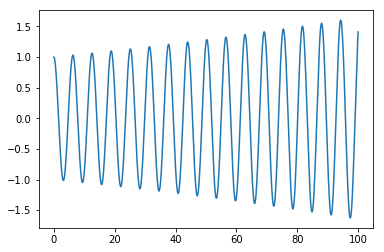

In [41]:


def Euler(f, t, x, dx, dt, params=[]):
    f(t, x, dx, dt, params)
    x += dx * dt
    
def RHS(t, x, dx, dt, params=[]):
    k = params[0]
    m = params[1]
    dx[0] = -k/m * x[1] # dv/dt
    dx[1] = x[0] # dx/dt
    
x = np.array([0.0, 1.0])
dx = np.zeros_like(x)

dt = 0.01
T = 100
N = int(T / dt)
print(N)
t = 0
ys = np.zeros((N, 2))
ys[0] = x

k = 1
m = 1

for i in range(1, N):
    t += dt
    Euler(RHS, t, x, dx, dt, params=[k, m])
    ys[i] = x
    

ts = np.arange(0, N)*dt
plt.plot(ts, ys[:, 1])

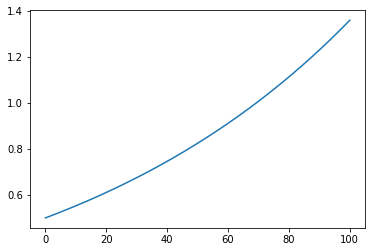

In [42]:
E = 0.5 * m * ys[:, 0]**2 + 0.5 * m * ys[:, 1]**2

plt.plot(ts, E)